In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


df = pd.read_csv("/content/spam.csv", encoding="latin")  # or 'iso-8859-1'


  DATA CLEANING
  

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df=df.drop(columns=["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"])

In [ ]:
df.sample(5)

,v1,v2
3927,ham,Babe ? I lost you ... Will you try rebooting ?
5242,ham,Hmm thinking lor...
1039,ham,They just talking thats it de. They wont any o...
3679,ham,I cant pick the phone right now. Pls send a me...
346,ham,Dis is yijue. I jus saw ur mail. In case huimi...


In [ ]:
df.rename(columns={"v1":"target", "v2":"text"}, inplace =True)

In [ ]:
df.sample(5)

,target,text
4799,ham,its cool but tyler had to take off so we're go...
4059,spam,This weeks SavaMob member offers are now acces...
4734,ham,Oh k:)after that placement there ah?
5019,ham,"It's cool, we can last a little while. Getting..."
1285,ham,"Just wondering, the others just took off"


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df["target"]=encoder.fit_transform(df["target"])

In [ ]:
df.sample(5)

,target,text
741,0,Do well :)all will for little time. Thing of g...
5420,0,I dont know oh. Hopefully this month.
2308,1,Moby Pub Quiz.Win a å£100 High Street prize if...
4784,1,Urgent -call 09066649731from Landline. Your co...
733,0,Even u dont get in trouble while convincing..j...


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:

df=df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

np.int64(0)


 EDA

In [ ]:



df.sample(5)

,target,text
3700,0,Shall i get my pouch?
953,0,Also remember to get dobby's bowl from your car
4923,0,We can go 4 e normal pilates after our intro...
3624,0,I want to tel u one thing u should not mistake...
4715,0,Hey. What happened? U switch off ur cell d who...


In [ ]:

df["target"].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x7b6231c85910>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

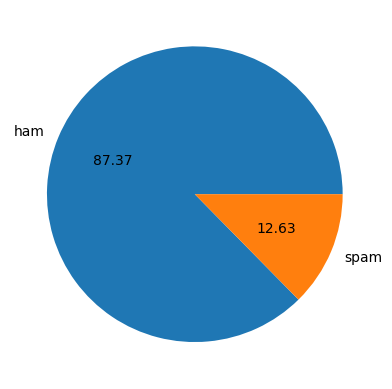

In [ ]:
plt.pie(df["target"].value_counts(), labels=["ham","spam"],autopct="%0.2f")

 data is imbalanced

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["num_characters"]=df["text"].apply(len)

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
1739,0,U guys never invite me anywhere :(,34,8,1
1726,0,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...,131,34,3
3178,0,Does cinema plus drink appeal tomo? * Is a fr ...,92,22,2
3094,0,Olol i printed out a forum post by a guy with ...,139,29,2
2805,0,Can a not?,10,4,1


In [ ]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
df[["num_characters",	"num_words",	"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==0][["num_characters",	"num_words",	"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==1][["num_characters",	"num_words",	"num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

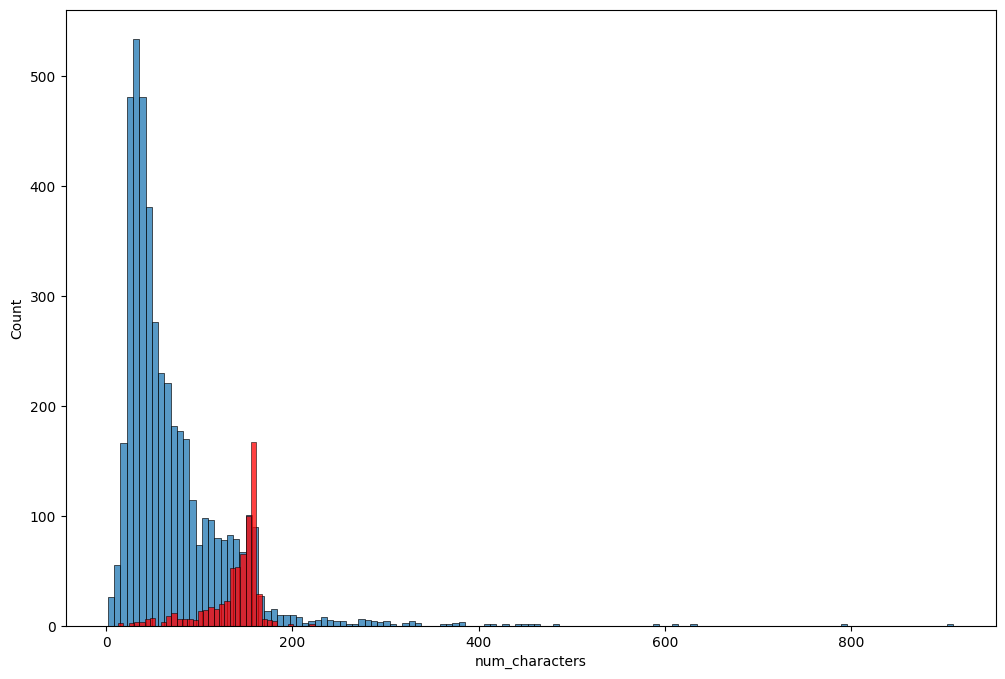

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

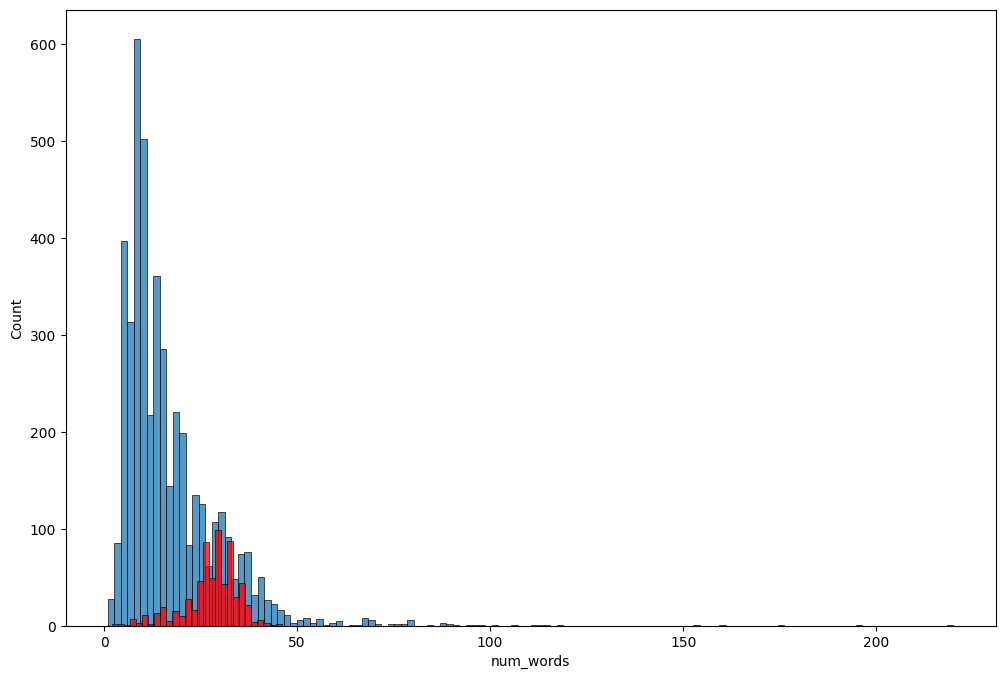

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

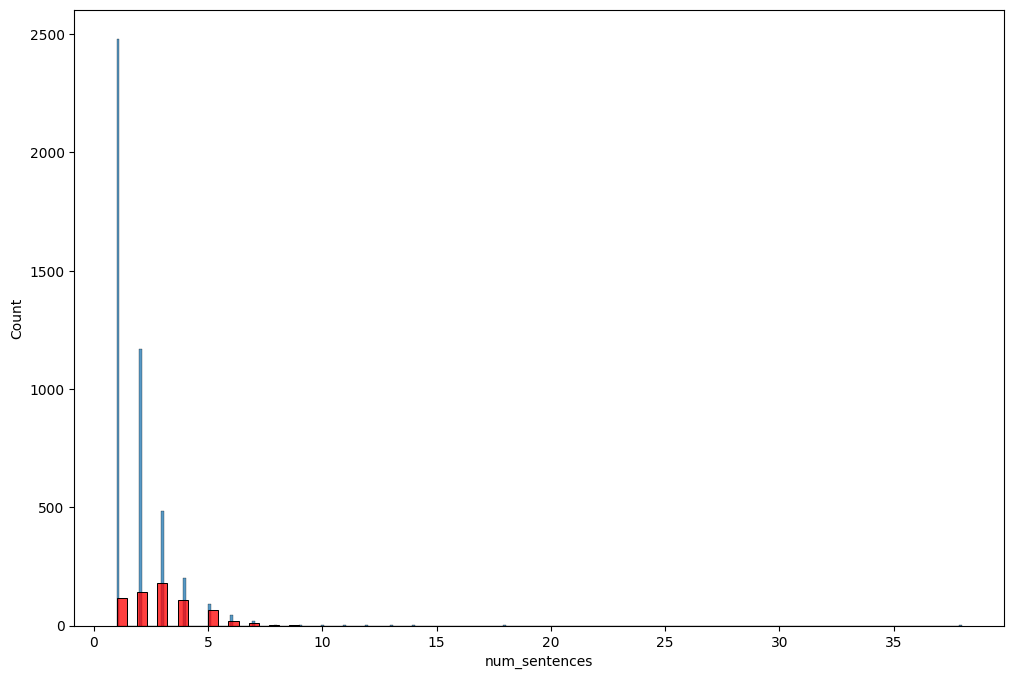

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color='red')

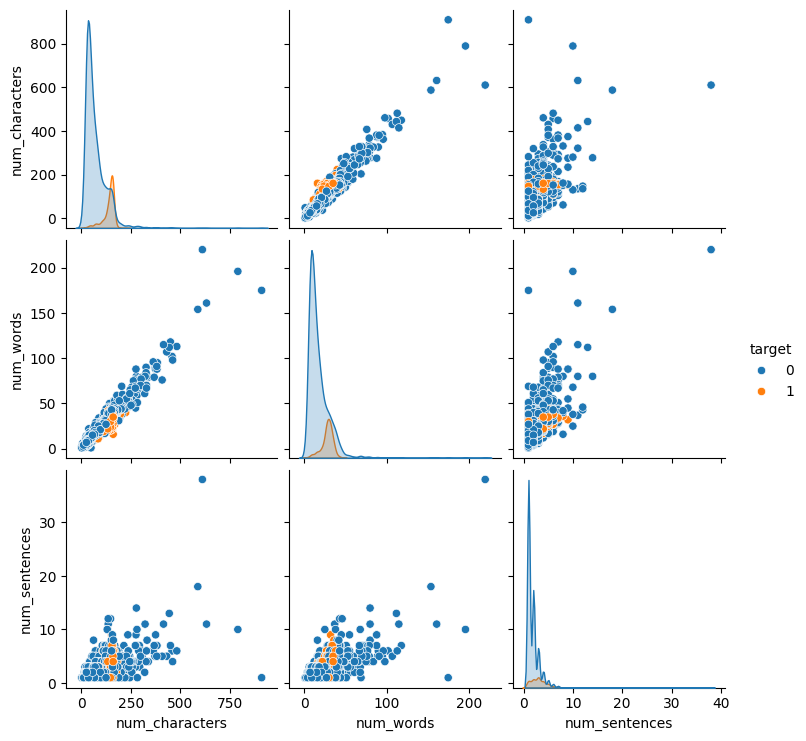

In [ ]:
sns.pairplot(df,hue="target")

<Axes: >

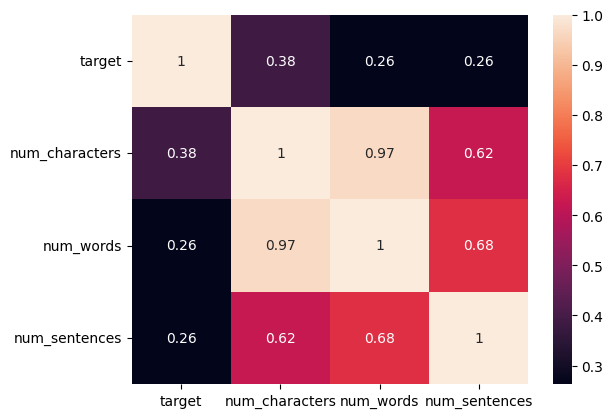

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Make sure resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Keep only alphanumeric tokens
    tokens = [t for t in tokens if t.isalnum()]

    # Remove stopwords and punctuation
    tokens = [t for t in tokens if t not in stopwords.words('english') and t not in string.punctuation]

    # Stemming
    tokens = [ps.stem(t) for t in tokens]

    return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
import string

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'
)


In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))


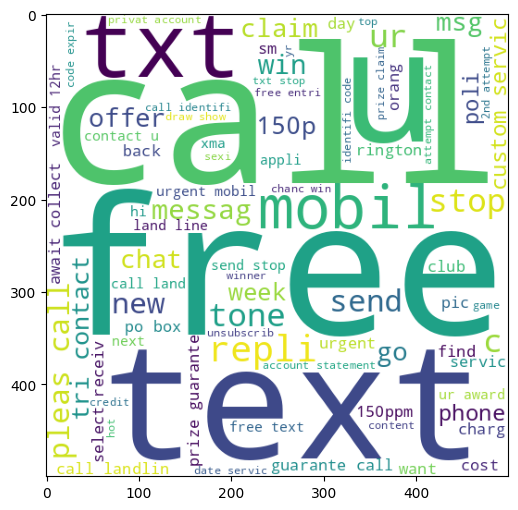

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))


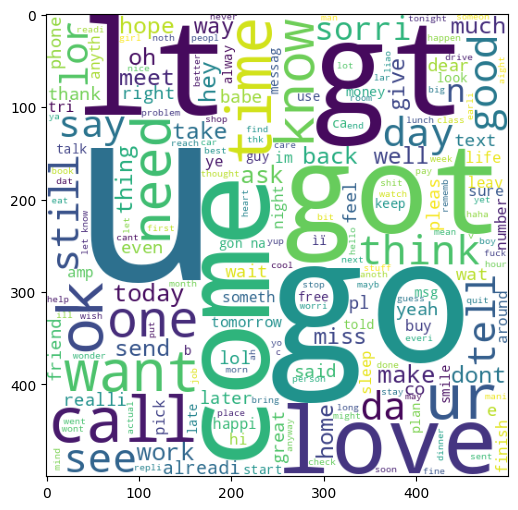

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


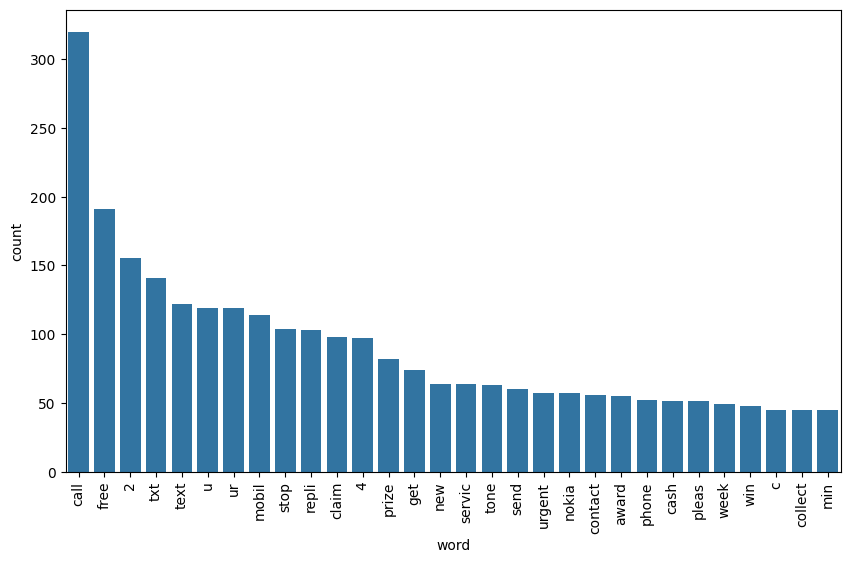

In [ ]:
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=word_freq)
plt.xticks(rotation=90)
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


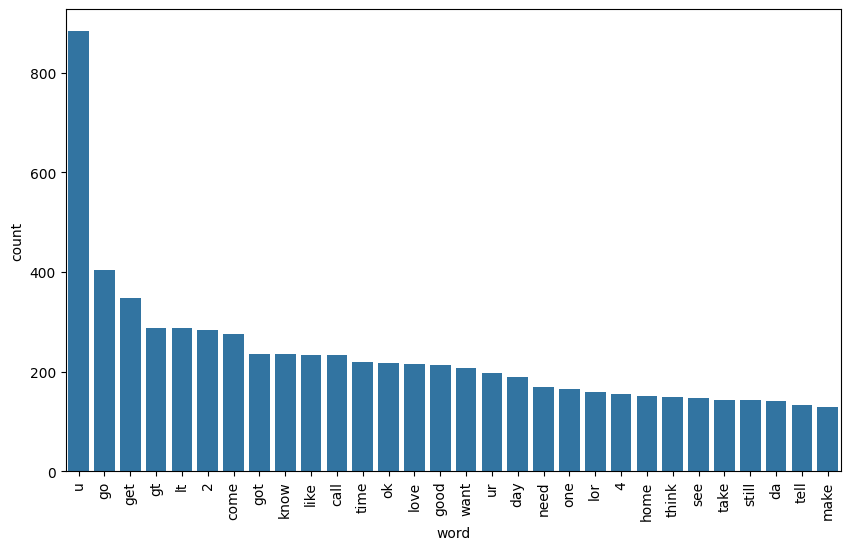

In [ ]:
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='word', y='count', data=word_freq)
plt.xticks(rotation=90)
plt.show()

MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
x=Tfidf.fit_transform(df['transformed_text']).toarray()


In [ ]:
x.shape

(5169, 3000)

In [ ]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score


In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [ ]:
# gnb.fit(x_train,y_train)
# y_pred1=gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
# mnb.fit(x_train,y_train)
# y_pred2=mnb.predict(x_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
# bnb.fit(x1_train,y_train)
# y_pred3=bnb.predict(x1_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


tfidf-->multinomial naive byes

In [ ]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_spam.pkl','wb'))
